# Численное интегрирование

In [2]:
def f(x):
    return x**4 - 2*x + 1

N = 10
a = 0.0
b = 2.0
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)
for k in range(1,N):
    s += f(a+k*h)

print(h*s)

4.50656


In [3]:
from gaussxw import gaussxw

def f(x):
    return x**4 - 2*x + 1

N = 3
a = 0.0
b = 2.0

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

4.4000000000000075


4.40000000000000
[4.3999999999999995, 0.2666666666666666, 0.016666666666666607, 0.0010416666666666075, 6.510416666660745e-05, 4.069010416607455e-06, 2.5431315098245477e-07, 1.5894571880892272e-08, 9.934106870446158e-10, 6.208811242913725e-11]


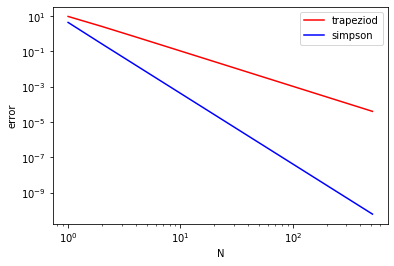

In [5]:
# Integration methods
from scipy.integrate import quad
from pylab import loglog, show, xlabel, ylabel, legend
from sympy import integrate, symbols
from math import sin, cos
from numpy import sum, linspace

def trapezoid(a,b,N):
	h = (b-a)/N
	sum = 0.5*(f(a)+f(b))
	x = a
	for i in range(1,N):
		x += h
		sum += f(x)
	return sum*h

def simpson(a,b,f,N):
	h = (b-a)/N
	x = linspace(a,b,N+1)
	y = f(x)
	return h/3.*sum(y[0:-1:2] + 4*y[1::2] + y[2::2])

def f(x):
	return x**4 - 2*x + 1
a=0.
b=2.
TrapezoidResiduals = []
SimpsonResiduals = []
Nsteps = [] 
x = symbols('x')
IntAnalytic = integrate(x**4 - 2*x + 1, (x, a, b))
integr = integrate(x**4 - 2*x + 1)
print(integr.subs(x,b))
IntScipy = quad(f,a,b)[0]
for i in range(10):
	N = 2**i
	Nsteps.append(N)
	TrapezoidResiduals.append(abs(trapezoid(a,b,N)-IntScipy))
	SimpsonResiduals.append(abs(simpson(a,b,f,N)-IntScipy))
print (SimpsonResiduals)

loglog(Nsteps,TrapezoidResiduals, '-r', label='trapeziod')
loglog(Nsteps,SimpsonResiduals, '-b', label='simpson')
xlabel('N')
ylabel('error')
legend()
show()

In [6]:
from gaussxw import gaussxwab
from math import exp

def f(z):
    return exp(-z**2/(1-z)**2)/(1-z)**2

N = 50
a = 0.0
b = 1.0
x,w = gaussxwab(N,a,b)
s = 0.0
for k in range(N):
    s += w[k]*f(x[k])
print(s)

0.8862269254528349
